In [1]:
import pandas as pd
dataset=pd.read_csv("preproplacement.csv")
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [2]:
dataset.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [3]:
def pdfprob(columnName,start,end):
    from matplotlib import pyplot
    import seaborn as sns
    from scipy.stats import norm
    ax=sns.distplot(columnName,kde=True,kde_kws={'color':'blue'}, color={'Green'})
    pyplot.axvline(start,color='Red')
    pyplot.axvline(end,color='Red')
    #generate sample
    sample=columnName
    #calculating parameters
    sample_mean=sample.mean()
    sample_std=sample.std()
    print("Mean= %3f, Standard Deviation= %3f" % (sample_mean,sample_std))
    #define distribution
    dist=norm(sample_mean,sample_std)
    #sample probabilities for a range of outcomes
    values=[value for value in range(start,end)]
    probabilities=[dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area of between range[{},{}]:{}".format(start,end,prob))
    return prob

Enter the column number for which do you want to see normal distribution and Density Function
'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'


 ssc_p
Enter the starting range 40
Enter the ending range 60


Cummulativer Density Function: 0.24186046511627907
Mean= 67.303395, Standard Deviation= 10.827205
The area of between range[40,60]:0.23035961179550077


C:\Users\Jayashree M\AppData\Local\Temp\ipykernel_26116\187209617.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(columnName,kde=True,kde_kws={'color':'blue'}, color={'Green'})


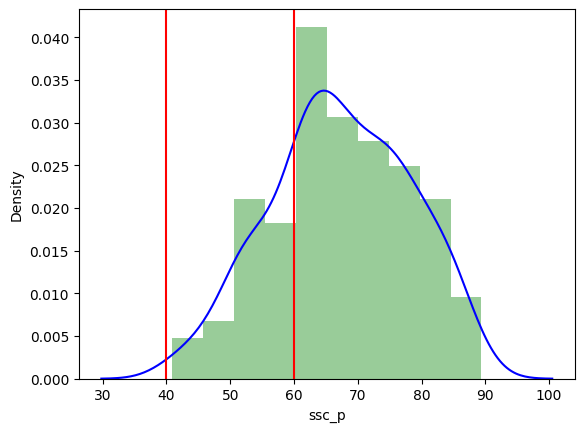

In [4]:
print("Enter the column number for which do you want to see normal distribution and Density Function")
print("'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'")  
col=input()
st=int(input("Enter the starting range"))
sp=int(input("Enter the ending range"))
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset[col])
print("Cummulativer Density Function of ",sp,"is ",ecdf(sp))
prob=pdfprob(dataset[col],st,sp)

In [ ]:
#!pip install statsmodels